# Importaciones y procesamiento instancias

In [5]:
# IMPORTAR LIBRERÍAS
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# LECTURA DE ARCHIVOS

# FUNCIÓN PARA LEER ARCHIVOS
def read_graph_from_file(filename):
    graph = nx.read_gml(filename)
    new_labels = {node: int(node) for node in graph.nodes()}
    graph = nx.relabel_nodes(graph, new_labels)
    return graph

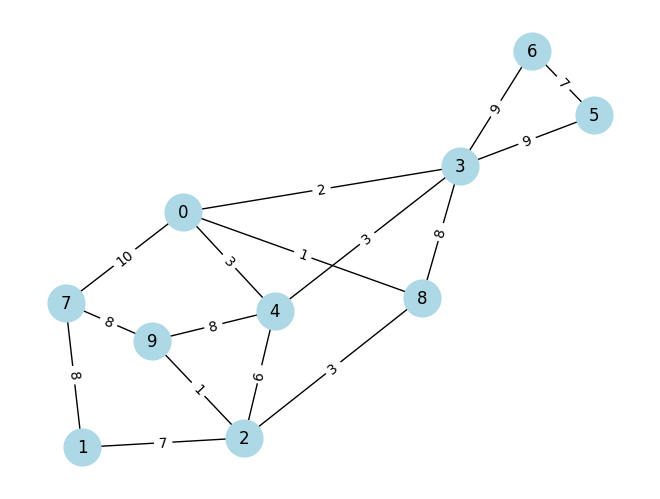

In [7]:
# LECTURA DEL GRAFO
# Para la ruta en caso de MacOs ocupar /, en cualquier otro caso ocupar \
graph_filename = 'Instancias_T3/Grafo.gml' 
G = read_graph_from_file(graph_filename)

# Dibujar el grafo
pos = nx.spring_layout(G, seed = 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

# Parte I

- $\alpha$: costo del largo total del tubería por distancia $[\frac{costo}{metros}] \rightarrow$ lo multiplico por el largo del árbol de rutas mínimas $\rightarrow$ calculo el costo de usar cada arco del árbol de rutas mínimas y eso lo multiplico por $\alpha$.
- $\beta$: costo del largo total de cables que se instalan $[\frac{costo}{metros}] \rightarrow$ lo multiplico por la suma de los costos de todas las rutas mínimas $\rightarrow$ a cada ruta minima le calculo el costo y eso lo multiplico por $\beta$.

- si $\alpha = 0 \rightarrow$ el unico costo que importa es el costo total de los cables, es decir, el costo total de enviar flujo por todas las rutas mínimas desde la raiz del árbol, en este caso nos conviene hacer **Dijkstra**, pero probando todas las posibles rutas?
- si $\beta = 0 \rightarrow$ el único costo que importa es el costo total de la tubería, es decir, la sumatoría de los costos de los arcos del arbol de rutas mínimas, en este caso nos conviene hacer **Prim**.

In [8]:
def alpha_dist_0(alpha, G):
    AMEM_G = nx.minimum_spanning_tree(G, algorithm='prim', weight='weight')
    AMEM_G_costos = sum(d['weight'] for u, v, d in AMEM_G.edges(data=True))

    print(f'El costo de la solución es {AMEM_G_costos*alpha}')
    return AMEM_G

def beta_dist_0(beta, G) -> list:
    # Calculamos todos los caminos más cortos entre pares de nodos usando los pesos
    costos = []

    RM_all_pairs = dict(nx.all_pairs_dijkstra_path(G, weight='weight'))

    # Calculamos los costos de los caminos más cortos entre pares de nodos usando los pesos
    RM_all_pairs_costo = dict(nx.all_pairs_dijkstra_path_length(G, weight='weight'))

    for source, costs in RM_all_pairs_costo.items():
        costos.append(sum(costs.values()))

    costo_min_index = costos.index(min(costos))              # NODO DEL DICCIONARIO DE RUTAS OPTIMA DE DIJKSTRA QUE TIENE MENOR COSTO TOTAL
    costo_min = sum(RM_all_pairs_costo[costo_min_index].values())

    ruta_optima = RM_all_pairs_costo[costo_min_index]

    print(f'El costo de la solución es {costo_min*beta}')
    
    return RM_all_pairs[costo_min_index]

In [9]:
def elegir_algoritmo(alpha: int, beta: int, G: nx.Graph) -> nx.Graph:
    if type(alpha) is int and type(alpha) is int:
        if alpha>=0 and beta>=0:
            print(f'ejecutamos el algoritmno para: beta={beta}, alpha={alpha}')
            if alpha == 0 and beta == 0:
                print('NO IMPORTA EL COSTO, HAGA LO QUE QUIERA')
            
            elif alpha == 0 and beta != 0:
                return beta_dist_0(beta, G)
            
            elif alpha != 0 and beta == 0:
                print('ejecutamos el algoritmo beta0')
                return alpha_dist_0(alpha, G)
                
            else:
                print('se resolverá en la parte 2')
        
        else:
            if alpha < 0:
                print(f'no se puede ejecutar el algoritmo?')
        
            else:
                print(f'no se puede ejecutar el algoritmo?')
            
    else:
        if type(alpha) is not int:
            print(f'ingrese un valor numérico para alpha')
        
        else:
            print(f'ingrese un valor numérico para beta')

In [10]:
def graficar_alpha_0(sol_alpha0: list) -> plt.plot:
    # Creamos un grafo multidigrafo para visualizar arcos paralelos
    M = nx.MultiDiGraph()

    # Añadimos los caminos al MultiDiGraph con arcos paralelos
    for target, path in sol_alpha0.items():
        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            weight = G[u][v]['weight']
            M.add_edge(u, v, weight=weight, path=path)

    # Dibujamos el grafo original en gris
    nx.draw(G, pos, with_labels=True, node_color='lightgrey', node_size=700, font_size=15)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

    # Dibujamos los caminos más cortos desde el nodo 0 en colores distintos para cada destino
    colors = plt.cm.rainbow(np.linspace(0, 1, len(sol_alpha0)))

    cont = 0

    for color, (target, path) in zip(colors, sol_alpha0.items()):
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]

        # Etiquetas de los arcos
        nx.draw_networkx_edge_labels(M, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in path_edges})

        # Desplazamiento para arcos paralelos
        for i, (u, v) in enumerate(path_edges):
            nx.draw_networkx_edges(M, pos, edgelist=[(u, v)], edge_color=[color], width=2,
                                        connectionstyle='arc3,rad='+str(-0.1*cont))    
        cont +=1

    plt.show()

In [11]:
def graficar_beta_0(sol: nx.Graph):
    # Minimum spanning tree = AMEM
    sol = nx.minimum_spanning_tree(G, algorithm='prim', weight='weight')

    # Dibujamos el grafo
    plt.subplots(1,2)

        # GRAFO ORIGINAL
    plt.subplot(1,2,1)
    pos = nx.spring_layout(G, seed = 1)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title('Red G')

        # ÁRBOL DE RUTAS MÍNIMAS

    plt.subplot(1,2,2)

    nx.draw(sol, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=15)
    nx.draw_networkx_edge_labels(sol, pos, edge_labels={(u, v): d['weight'] for u, v, d in sol.edges(data=True)})
    plt.title('Árbol de rutas mínimas de G')

    plt.tight_layout()
    plt.show()

ejecutamos el algoritmno para: beta=10, alpha=0
El costo de la solución es 580


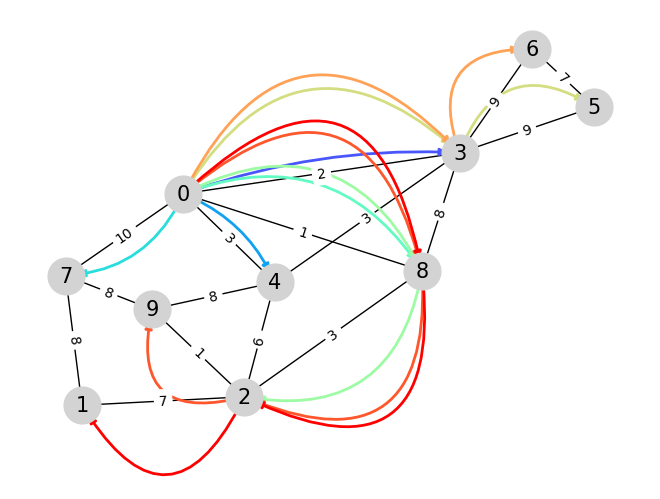

In [12]:
alpha = 0
beta = 10

sol = elegir_algoritmo(alpha, beta, G)

if alpha==0 and beta!=0:
    graficar_alpha_0(sol)

elif alpha!=0 and beta==0:
    graficar_beta_0(sol)

else:
    print('solucion de la parte 2')

Text(0.5, 1.0, 'Red G')

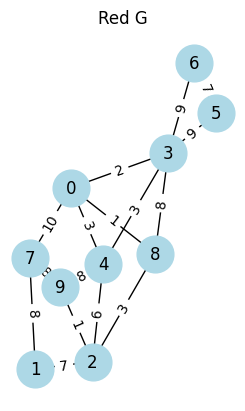

In [13]:
plt.subplot(1,2,1)
pos = nx.spring_layout(G, seed = 1)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Red G')

# Parte II

In [119]:
def resolver_problema_general(alpha, beta, G):
    # Paso 1: Crear el AMEM inicial, considerando solo las tuberías
    amem = nx.minimum_spanning_tree(G, algorithm='prim', weight='weight')
    costo_amem = sum(d['weight'] for _, _, d in amem.edges(data=True)) * alpha

    # Paso 2: Calcular las rutas más cortas desde el nodo 0 para estimar el costo de los cables
    distancias_cortas = dict(nx.single_source_dijkstra_path_length(G, source=0, weight='weight'))
    costo_cables = sum(distancias_cortas.values()) * beta

    # Paso 3: Sacar el costo total inicial
    costo_total = costo_amem + costo_cables
    print(f"Inicial: Costo total = {costo_total} (Tuberías: {costo_amem}, Cables: {costo_cables})")

    # Paso 4: Optimizar iterativamente el AMEM para mejorar el costo total
    mejoramos = True 
    while mejoramos:
        mejoramos = False
        mejor_candidato = None  # Aquí guardaremos la mejor arista para añadir
        mejor_costo = costo_total

        # Revisamos todas las conexiones posibles en el grafo
        for u, v, datos in G.edges(data=True):
            # Creamos un AMEM temporal para probar una nueva conexión
            amem_temp = amem.copy()
            if (u, v) not in amem_temp.edges() and not nx.has_path(amem_temp, u, v):  # Evitar ciclos
                amem_temp.add_edge(u, v, weight=datos['weight'])

                # Calculamos el nuevo costo del AMEM con la conexión probada
                nuevo_costo_amem = sum(d['weight'] for _, _, d in amem_temp.edges(data=True)) * alpha

                # Calculamos las nuevas rutas más cortas desde el nodo 0
                nuevas_distancias_cortas = dict(nx.single_source_dijkstra_path_length(amem_temp, source=0, weight='weight'))
                nuevo_costo_cables = sum(nuevas_distancias_cortas.values()) * beta

                # Calculamos el nuevo costo total
                nuevo_costo_total = nuevo_costo_amem + nuevo_costo_cables

                # Si el costo mejora, actualizamos el mejor candidato
                if nuevo_costo_total < mejor_costo:
                    mejor_costo = nuevo_costo_total
                    mejor_candidato = (u, v)

        # Si encontramos una mejora, aplicamos el cambio al AMEM
        if mejor_candidato:
            u, v = mejor_candidato
            amem.add_edge(u, v, weight=G[u][v]['weight'])
            costo_amem = sum(d['weight'] for _, _, d in amem.edges(data=True)) * alpha
            distancias_cortas = dict(nx.single_source_dijkstra_path_length(amem, source=0, weight='weight'))
            costo_cables = sum(distancias_cortas.values()) * beta
            costo_total = mejor_costo
            mejoramos = True  # Seguimos iterando porque hubo un cambio

    # Paso 5: Imprimimos el resultado final
    print(f"Final: Costo total = {costo_total} (Tuberías: {costo_amem}, Cables: {costo_cables})")
    return amem




def plot(G, mst):
    pos = nx.spring_layout(G, seed=1)
    # Graficar grafo original
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
    # Graficar el árbol solución
    nx.draw(mst, pos, with_labels=True, node_color='lightgreen', node_size=700, edge_color='red', width=2)
    plt.title("Solución Final")
    plt.show()



In [123]:
arbol = resolver_problema_general(5.5, 1, G)

Inicial: Costo total = 283.5 (Tuberías: 225.5, Cables: 58)
Final: Costo total = 283.5 (Tuberías: 225.5, Cables: 58)


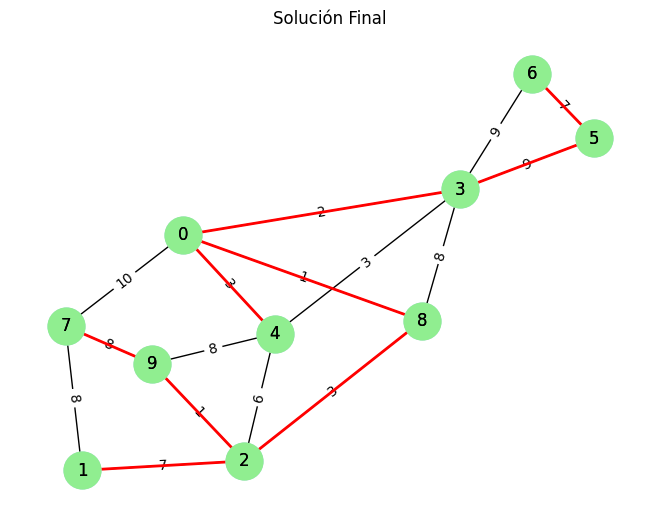

In [124]:
plot(G, arbol)

In [ ]:
def caso_general(alpha, beta, G):
    if alpha < 0 or beta < 0:
        raise ValueError("No se aceptan parametros negativos.")
    
    #Crear el AMEM
    AMEM = nx.minimum_spanning_tree(G, algorithm='prim', weight='weight')
    costo_tuberias = sum(d['weight'] for u, v, d in AMEM.edges(data=True)) * alpha

    #Calcular las rutas más cortas para minimizar costos de cables
    caminos_cables = {}  # Guardará las rutas más cortas desde el nodo central
    costos_cables = 0

    for nodo in G.nodes:
        if nodo != 0:  # Excluimos el computador central
            # Usamos Dijkstra para encontrar el camino más corto a la central
            path = nx.shortest_path(G, source=0, target=nodo, weight='weight')
            caminos_cables[nodo] = path

            # Calculamos el costo del cable para esta ruta
            costos_cables += sum(G[path[i]][path[i + 1]]['weight'] for i in range(len(path) - 1))

    costo_cables = costos_cables * beta

    # Paso 3: Combinación de soluciones
    costo_total = costo_tuberias + costo_cables

    print(f"Costo total: {costo_total}")
    print(f"Costo tuberías: {costo_tuberias}")
    print(f"Costo cables: {costo_cables}")

    return AMEM, caminos_cables, costo_total


In [ ]:
def graficar_solucion(AMEM, caminos_cables, G):
    pos = nx.spring_layout(G, seed=1)

    plt.figure(figsize=(14, 7))

    #graficar el AMEM (Árbol Mínimo de Envergadura Máxima) debería ser siempre el mismo
    plt.subplot(1, 2, 1)
    nx.draw(AMEM, pos, with_labels=True, node_color='lightblue', node_size=700)
    edge_labels = nx.get_edge_attributes(AMEM, 'weight')
    nx.draw_networkx_edge_labels(AMEM, pos, edge_labels=edge_labels)
    plt.title("Árbol Mínimo de Envergadura Máxima (AMEM)")

    # Graficar las rutas óptimas para cables en colores
    plt.subplot(1, 2, 2)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, alpha=0.3)

    #agregregamos los arcos paralelos que representarán a los cables
    M = nx.MultiDiGraph()
    for target, path in caminos_cables.items():
        for i in range(len(path) - 1):
            u, v = path[i], path[i + 1]
            weight = G[u][v]['weight']
            M.add_edge(u, v, weight=weight)

    #un color para cada destino
    colors = plt.cm.rainbow(np.linspace(0, 1, len(caminos_cables)))
    cont = 0

    for color, (target, path) in zip(colors, caminos_cables.items()):
        path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]

        # Dibujar etiquetas de peso
        nx.draw_networkx_edge_labels(
            M, pos, edge_labels={(u, v): G[u][v]['weight'] for u, v in path_edges}
        )

        #dibujar arcos en colores que representan a los cables
        for u, v in path_edges:
            nx.draw_networkx_edges(
                M, pos, edgelist=[(u, v)], edge_color=[color], width=2,
                connectionstyle=f'arc3,rad={-0.1 * cont}'
            )
        cont += 1

    plt.title("Rutas óptimas para cables")
    plt.tight_layout()
    plt.show()



--------------------------------------------------
Solución para alpha = 0, beta = 1:
Costo total: 58
Costo tuberías: 0
Costo cables: 58
Grafico para alpha = 0, beta = 1


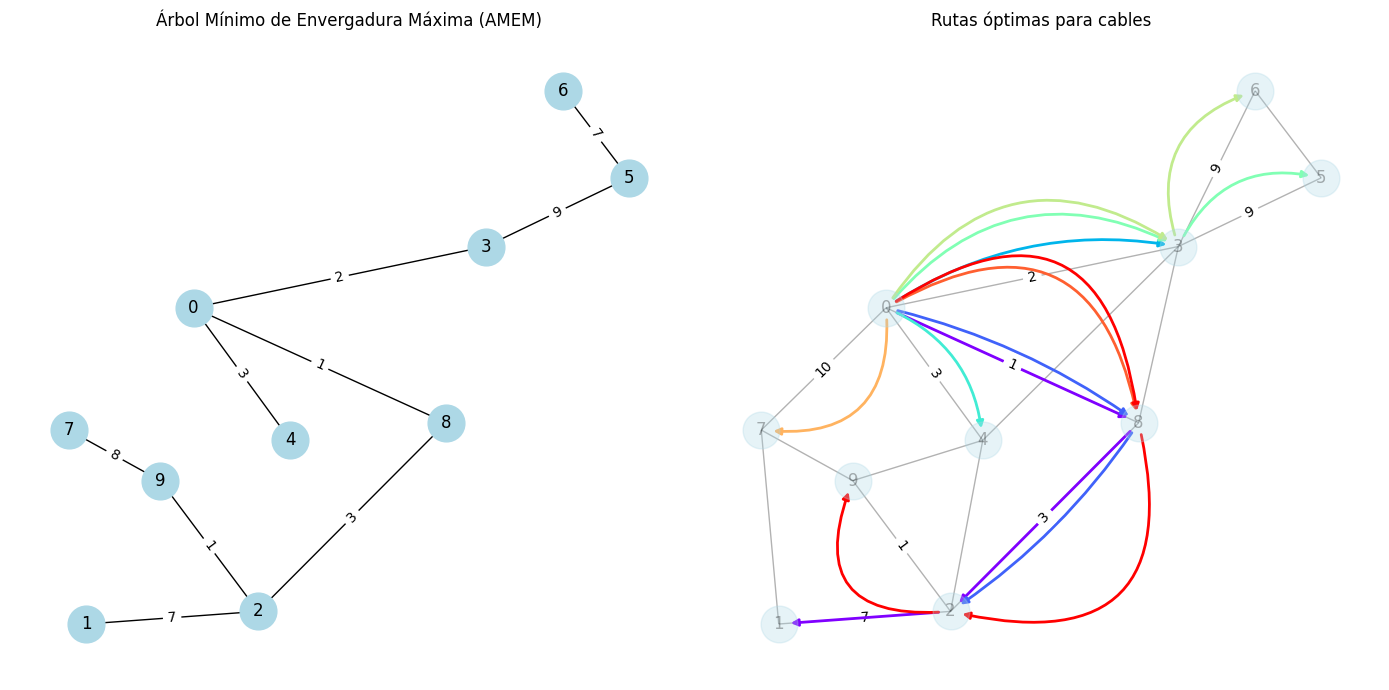

--------------------------------------------------
Solución para alpha = 0.1, beta = 1:
Costo total: 62.1
Costo tuberías: 4.1000000000000005
Costo cables: 58
Grafico para alpha = 0.1, beta = 1


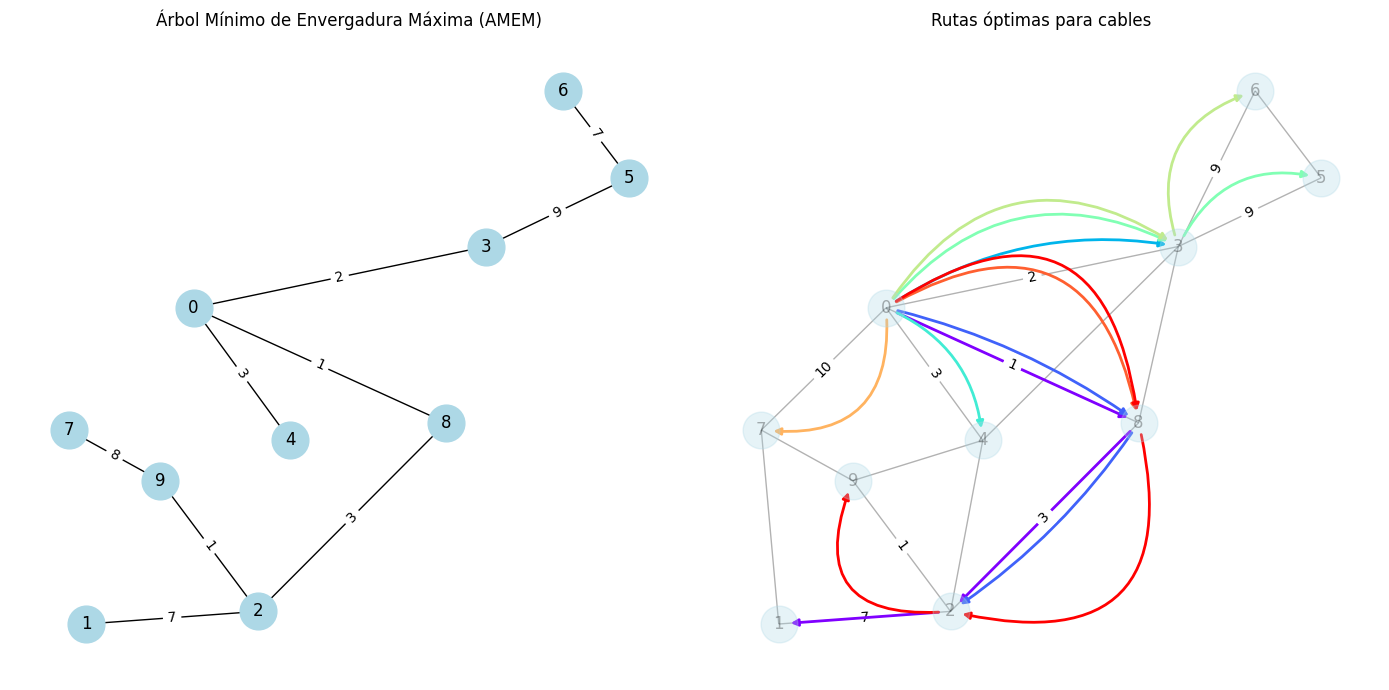

--------------------------------------------------
Solución para alpha = 0.1, beta = 1:
Costo total: 62.1
Costo tuberías: 4.1000000000000005
Costo cables: 58
Grafico para alpha = 0.1, beta = 1


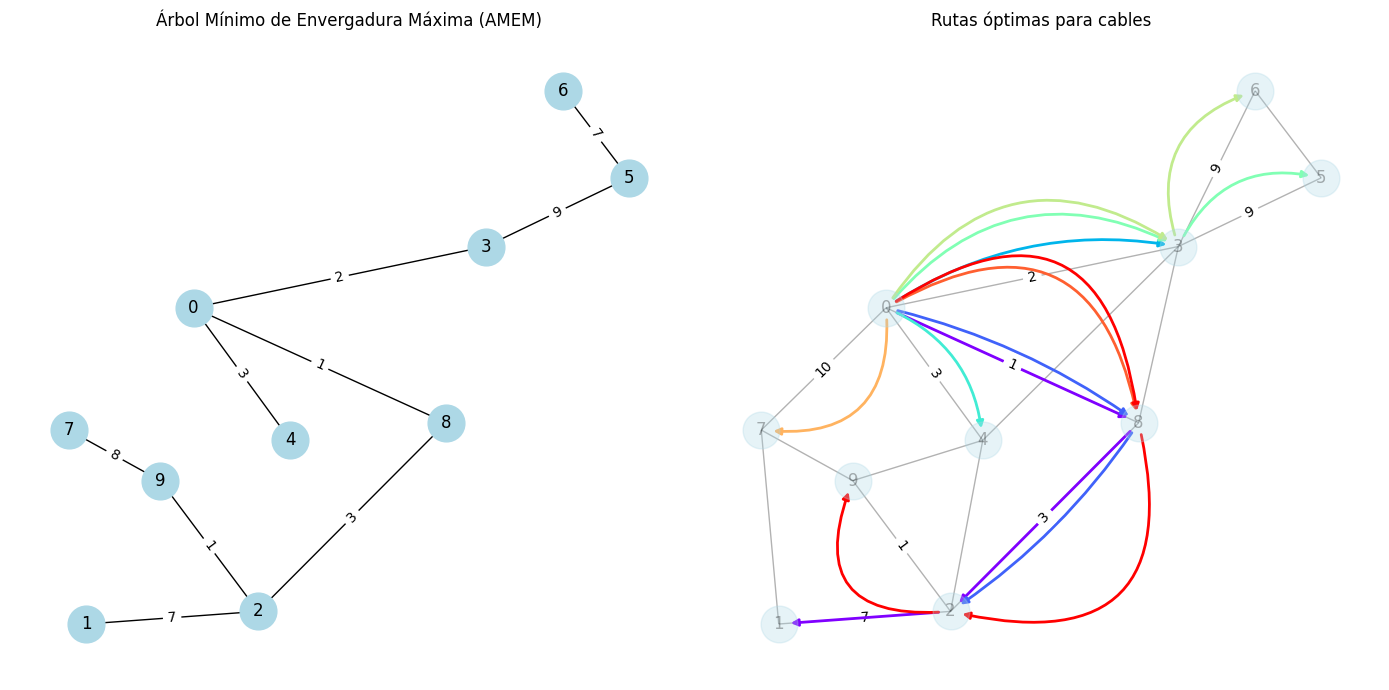

--------------------------------------------------
Solución para alpha = 0.2, beta = 1:
Costo total: 66.2
Costo tuberías: 8.200000000000001
Costo cables: 58
Grafico para alpha = 0.2, beta = 1


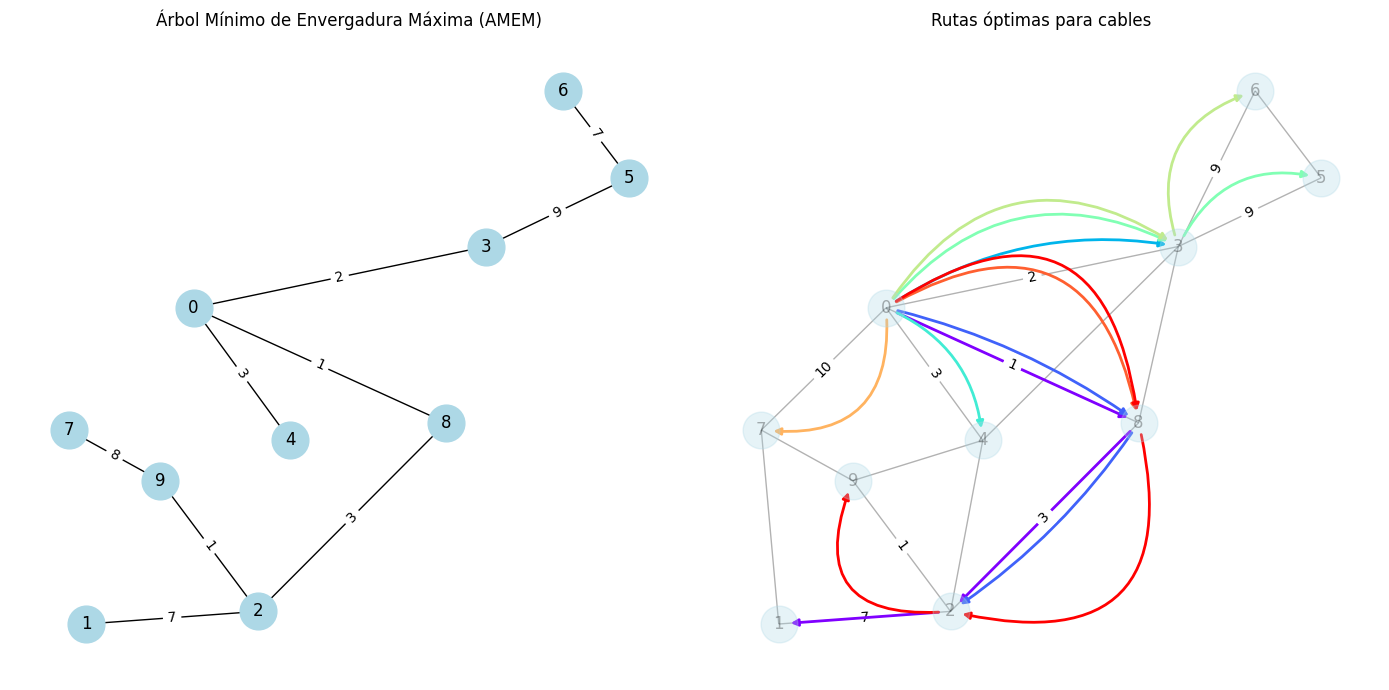

--------------------------------------------------
Solución para alpha = 0.3, beta = 1:
Costo total: 70.3
Costo tuberías: 12.299999999999999
Costo cables: 58
Grafico para alpha = 0.3, beta = 1


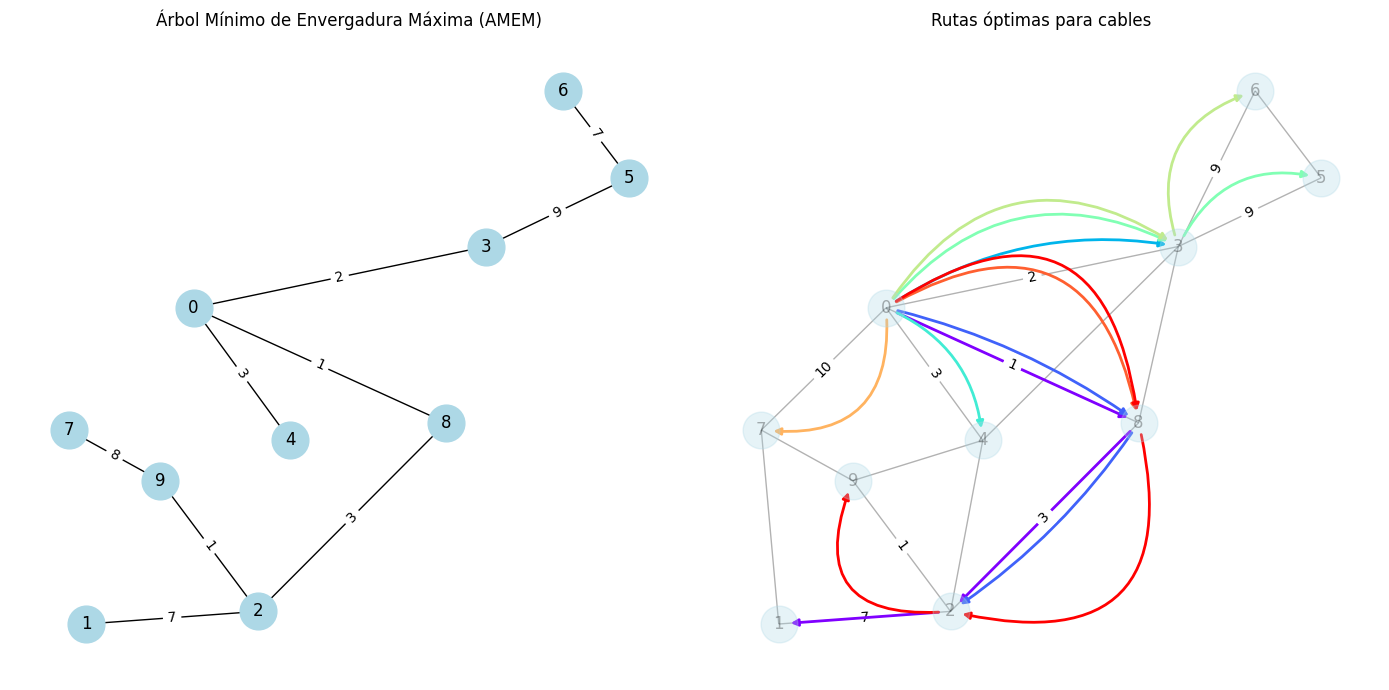

--------------------------------------------------
Solución para alpha = 0.5, beta = 1:
Costo total: 78.5
Costo tuberías: 20.5
Costo cables: 58
Grafico para alpha = 0.5, beta = 1


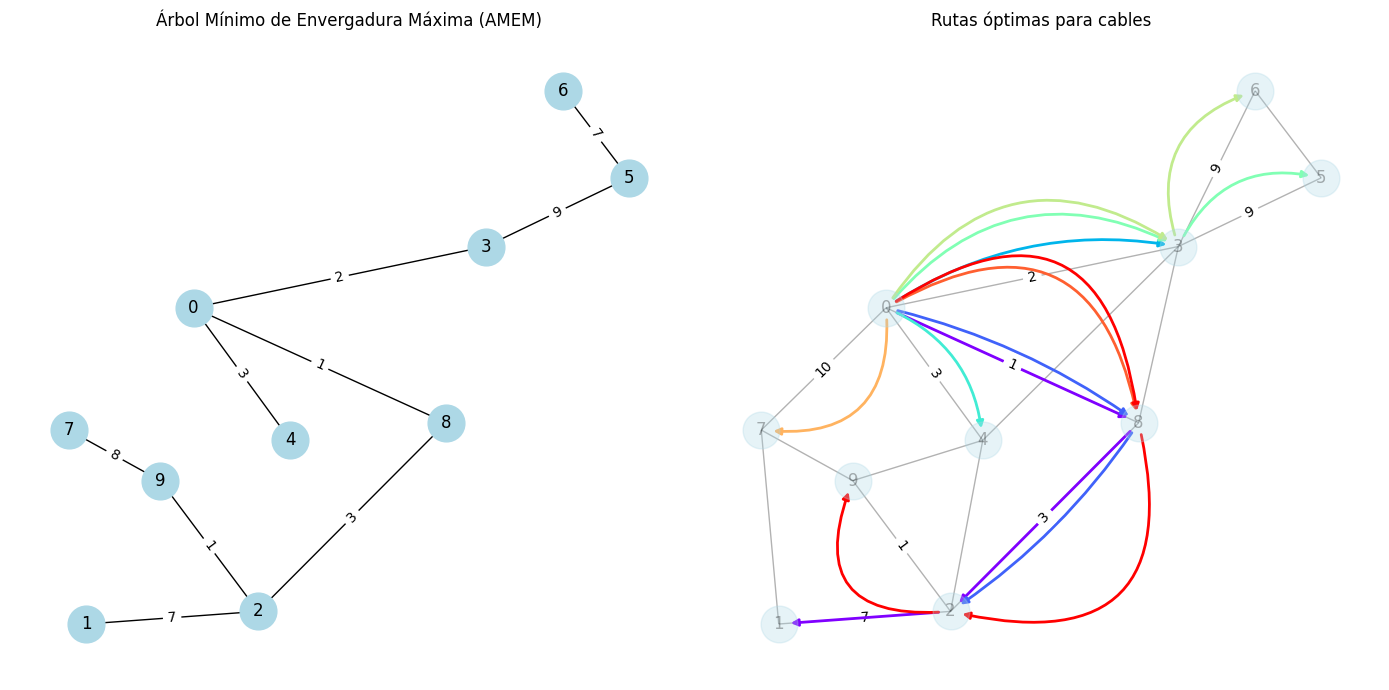

--------------------------------------------------
Solución para alpha = 0.8, beta = 1:
Costo total: 90.80000000000001
Costo tuberías: 32.800000000000004
Costo cables: 58
Grafico para alpha = 0.8, beta = 1


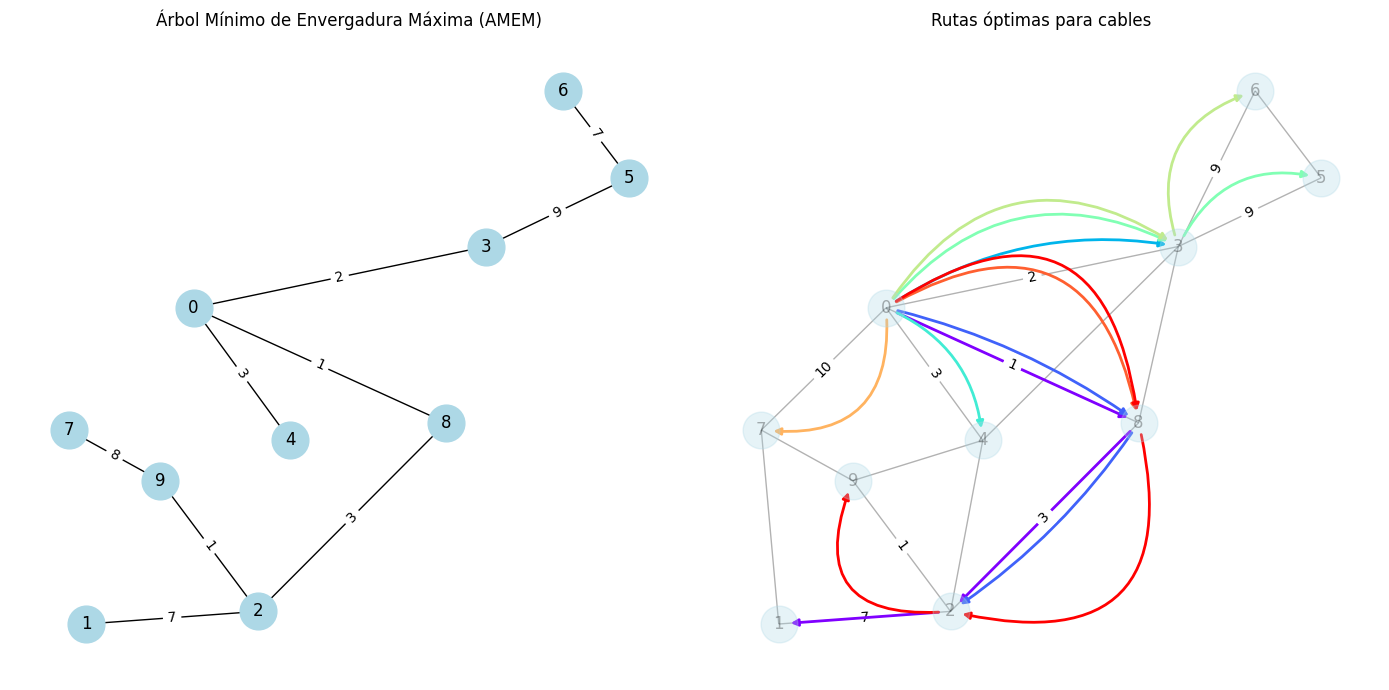

--------------------------------------------------
Solución para alpha = 1.3, beta = 1:
Costo total: 111.30000000000001
Costo tuberías: 53.300000000000004
Costo cables: 58
Grafico para alpha = 1.3, beta = 1


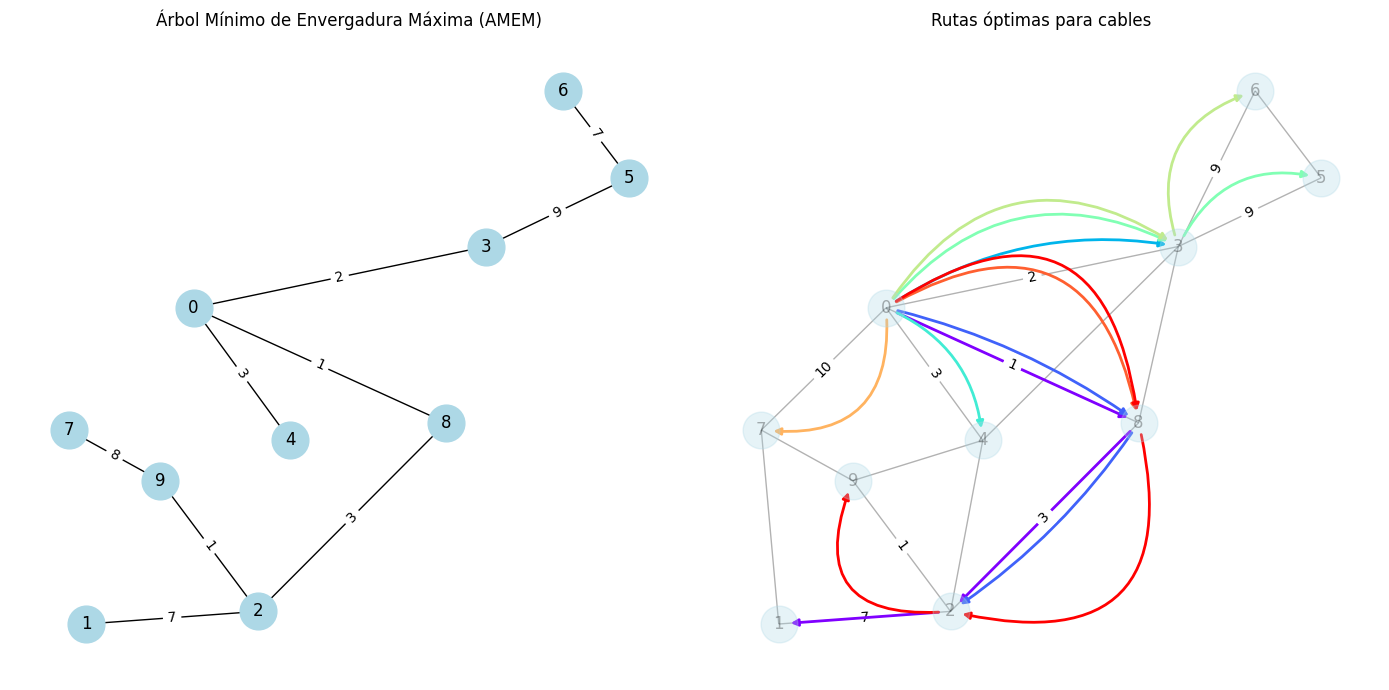

--------------------------------------------------
Solución para alpha = 2.1, beta = 1:
Costo total: 144.10000000000002
Costo tuberías: 86.10000000000001
Costo cables: 58
Grafico para alpha = 2.1, beta = 1


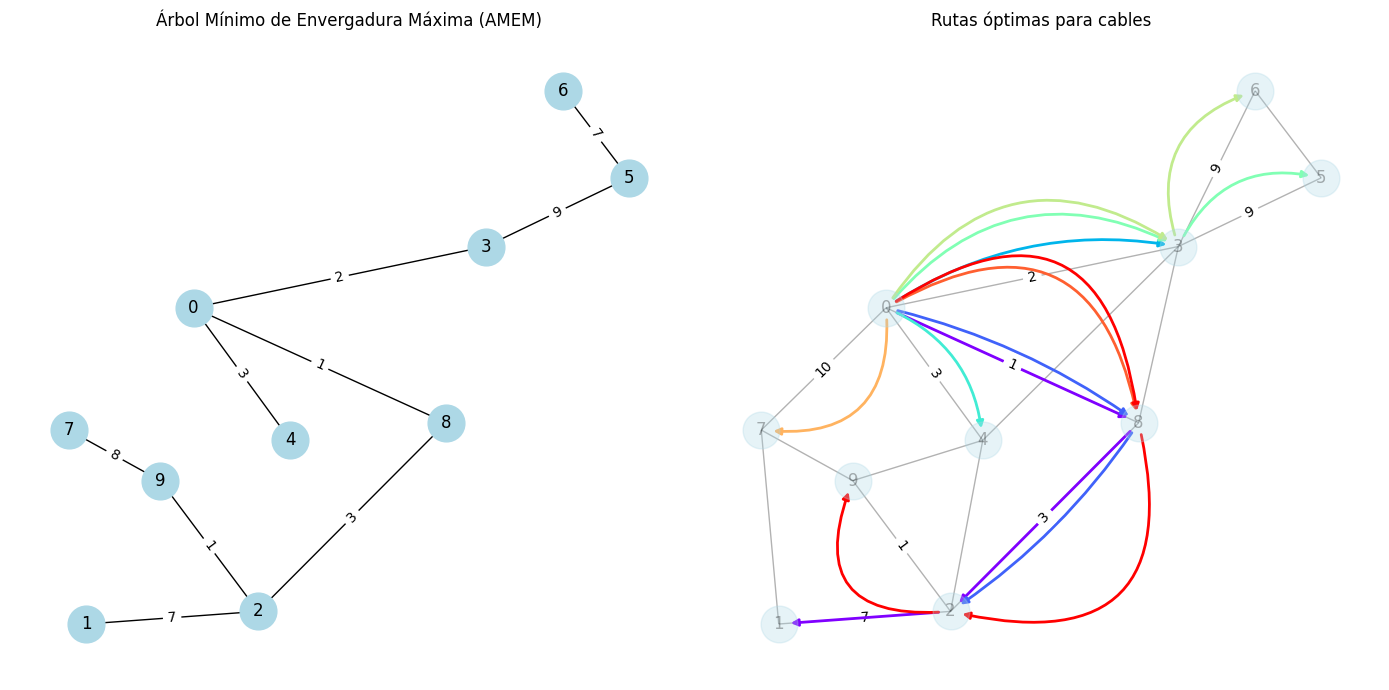

--------------------------------------------------
Solución para alpha = 3.4, beta = 1:
Costo total: 197.4
Costo tuberías: 139.4
Costo cables: 58
Grafico para alpha = 3.4, beta = 1


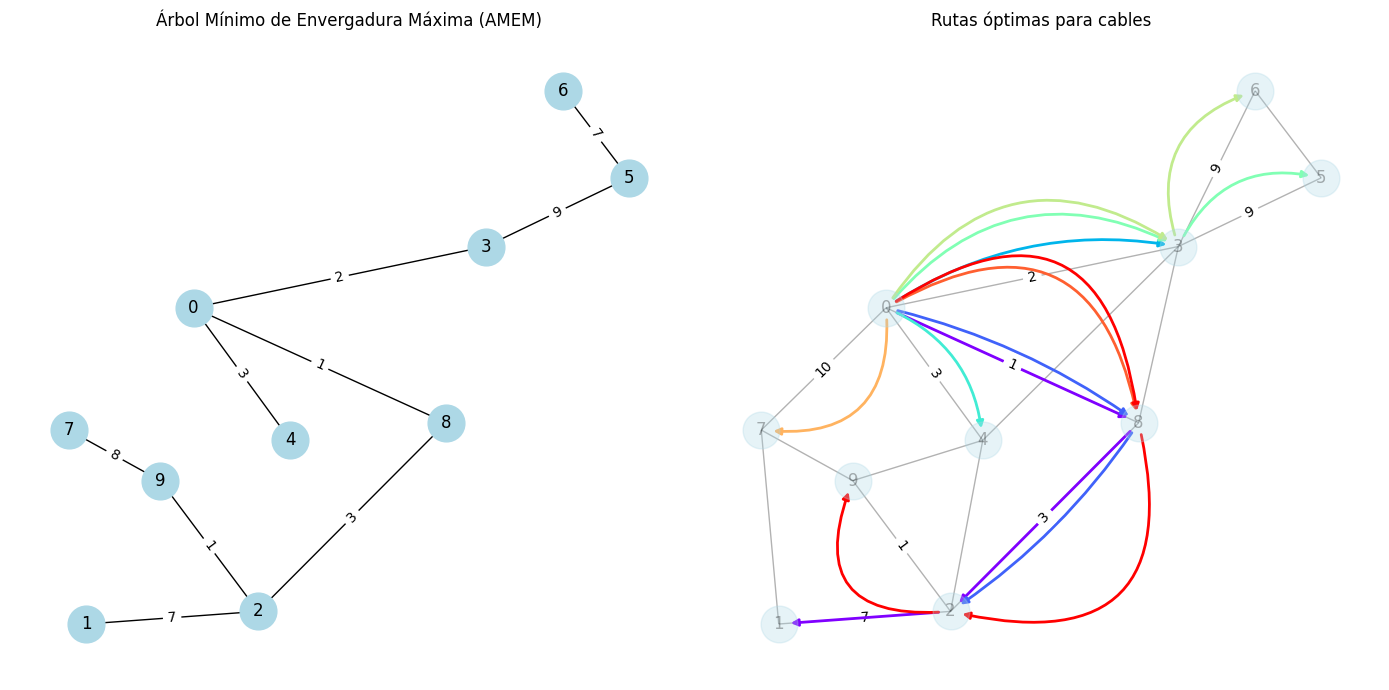

--------------------------------------------------
Solución para alpha = 5.5, beta = 1:
Costo total: 283.5
Costo tuberías: 225.5
Costo cables: 58
Grafico para alpha = 5.5, beta = 1


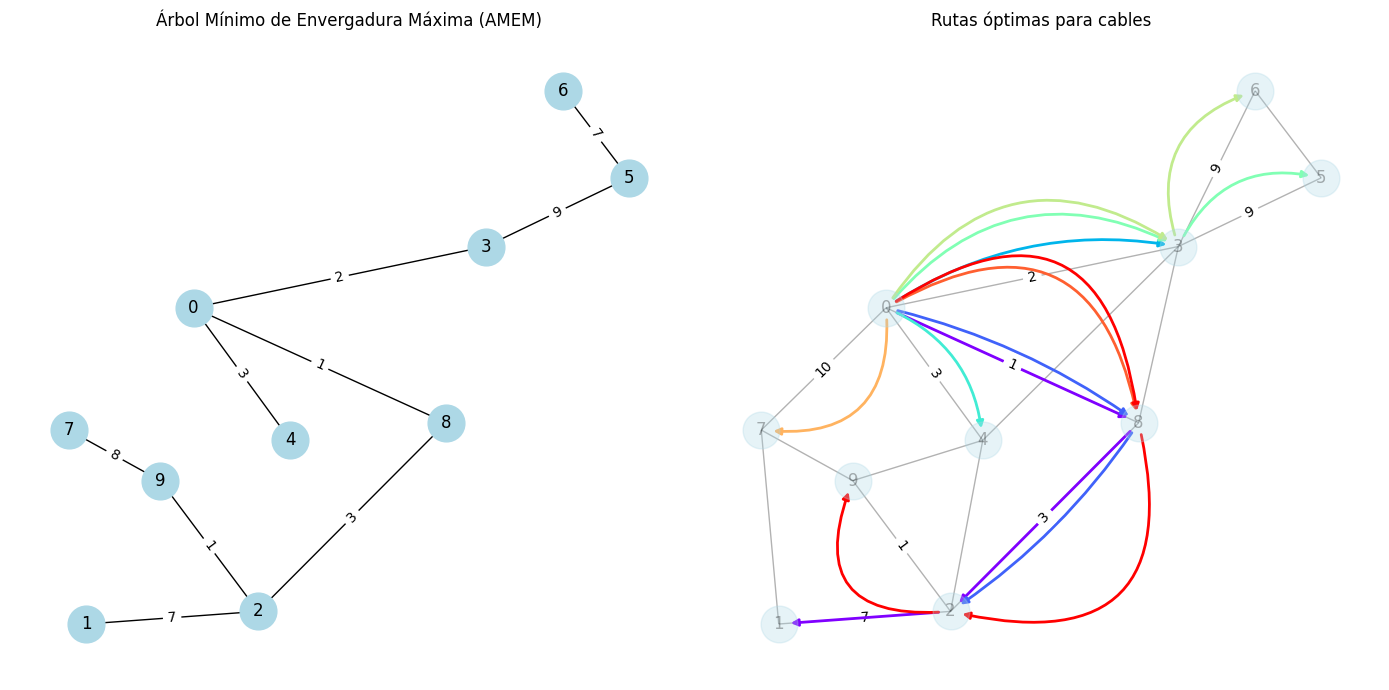

--------------------------------------------------
Solución para alpha = 8.9, beta = 1:
Costo total: 422.90000000000003
Costo tuberías: 364.90000000000003
Costo cables: 58
Grafico para alpha = 8.9, beta = 1


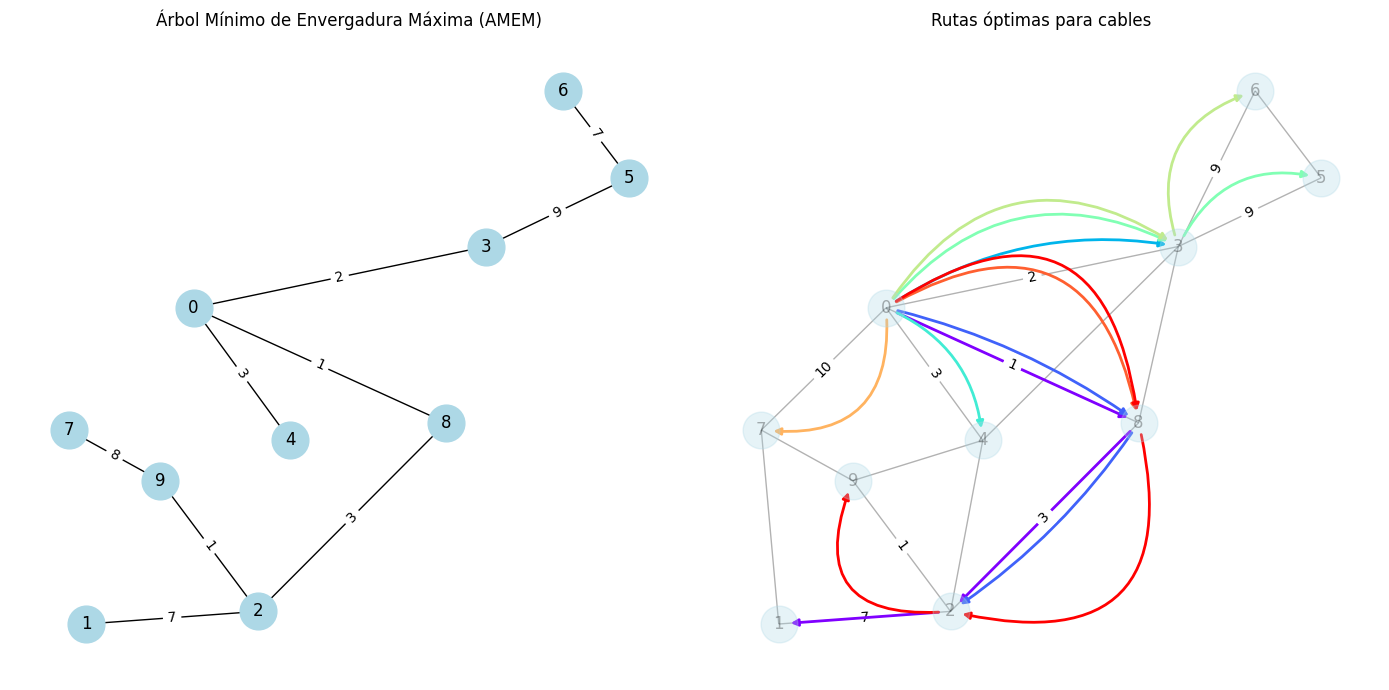

--------------------------------------------------
Solución para alpha = 14.4, beta = 1:
Costo total: 648.4
Costo tuberías: 590.4
Costo cables: 58
Grafico para alpha = 14.4, beta = 1


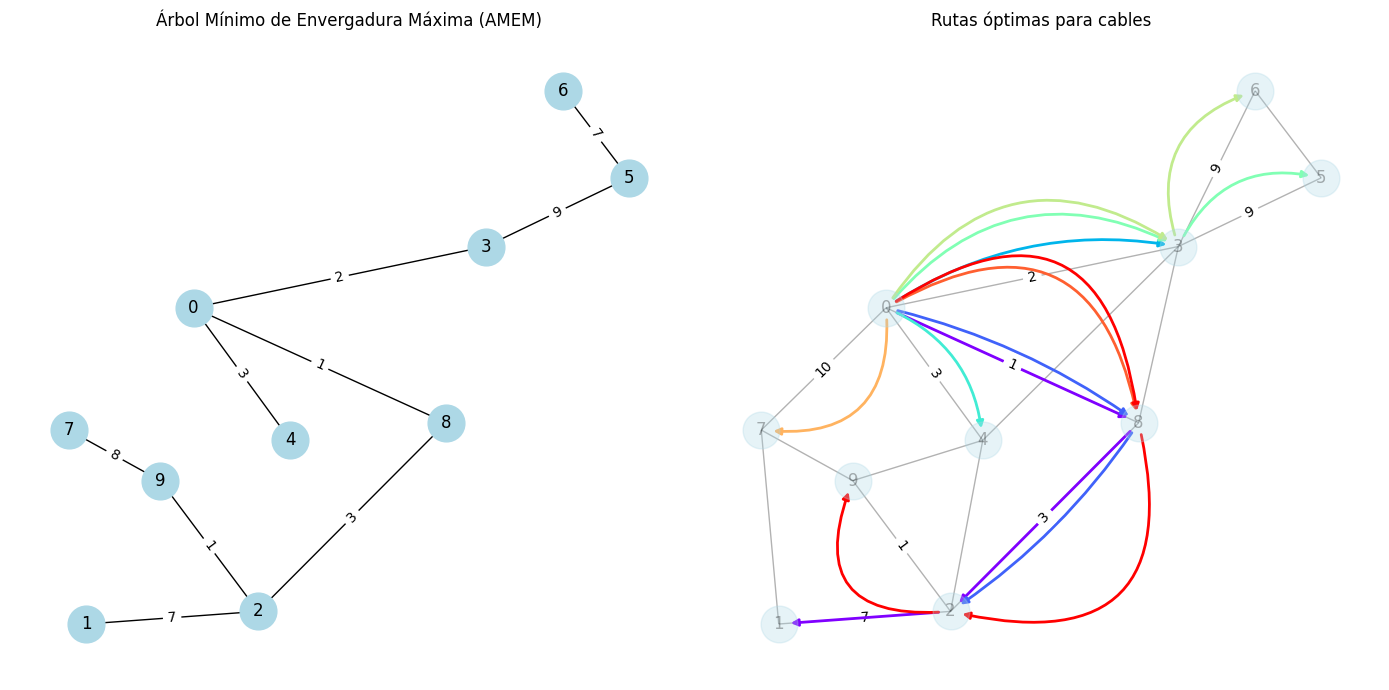

--------------------------------------------------
Solución para alpha = 23.3, beta = 1:
Costo total: 1013.3000000000001
Costo tuberías: 955.3000000000001
Costo cables: 58
Grafico para alpha = 23.3, beta = 1


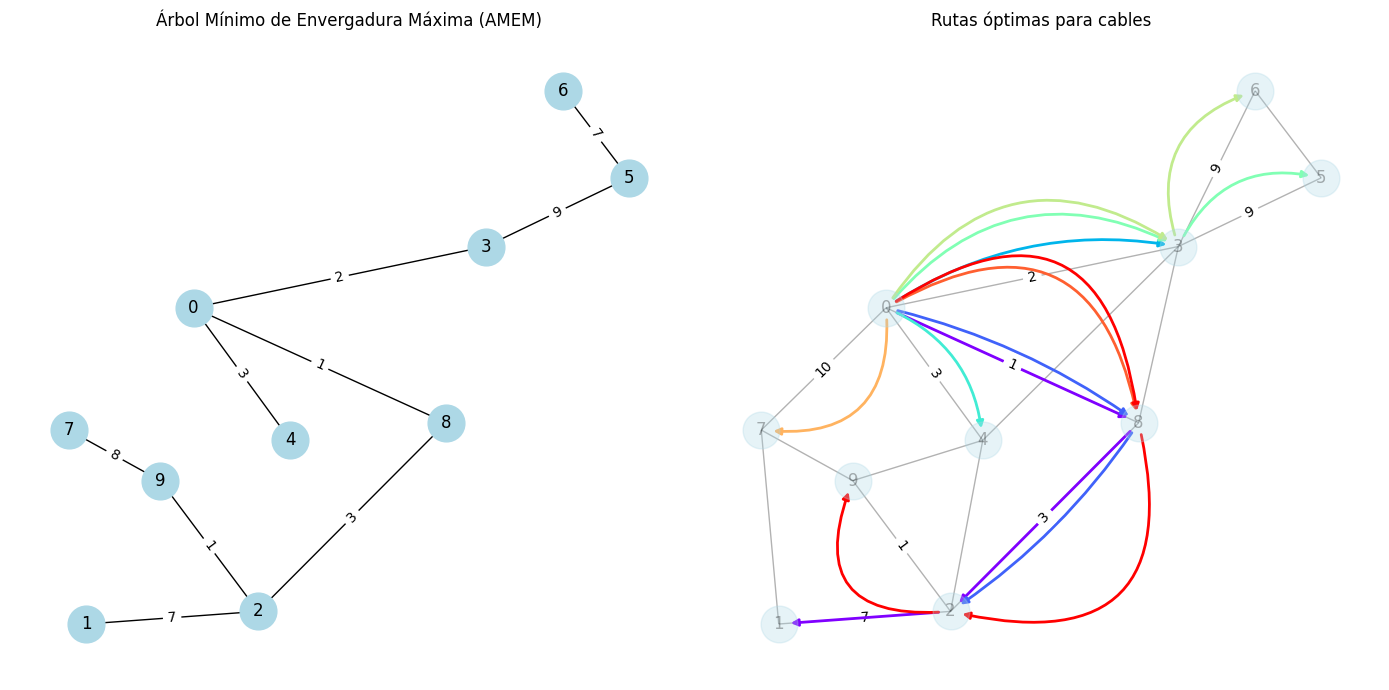

--------------------------------------------------
Solución para alpha = 37.7, beta = 1:
Costo total: 1603.7
Costo tuberías: 1545.7
Costo cables: 58
Grafico para alpha = 37.7, beta = 1


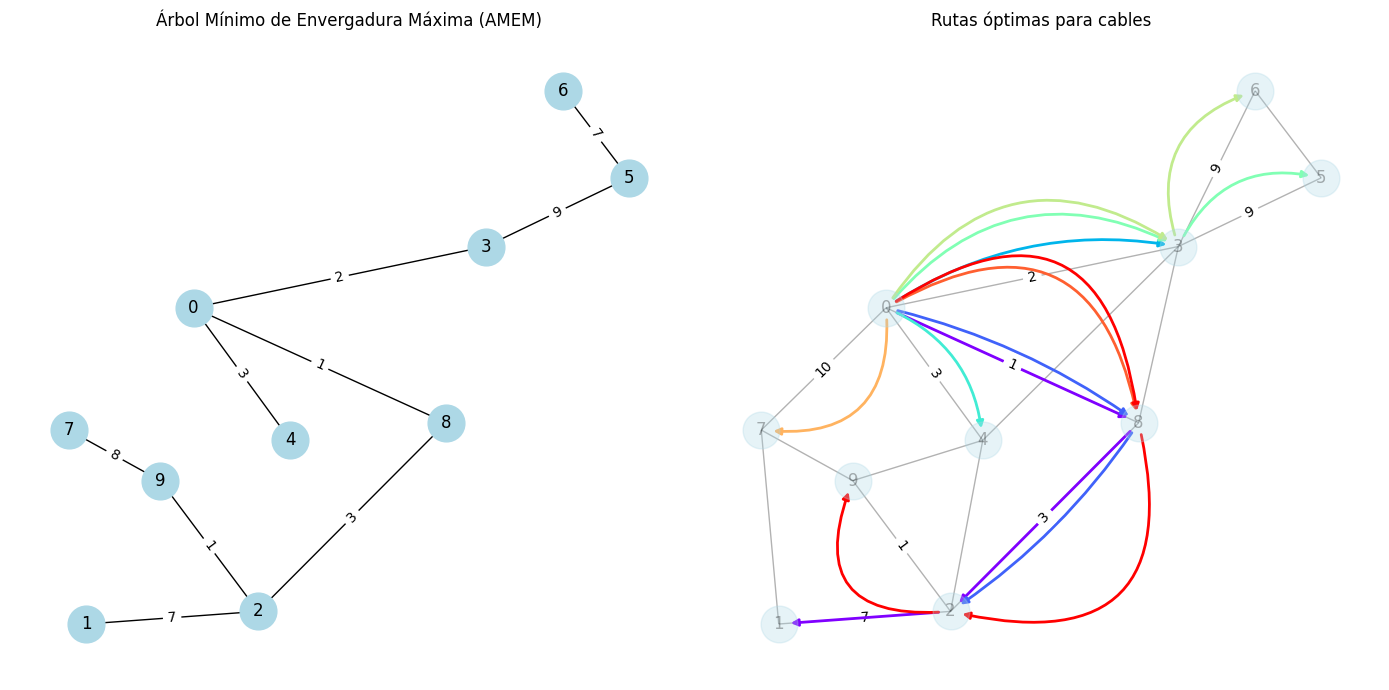

--------------------------------------------------
Solución para alpha = 61.0, beta = 1:
Costo total: 2559.0
Costo tuberías: 2501.0
Costo cables: 58
Grafico para alpha = 61.0, beta = 1


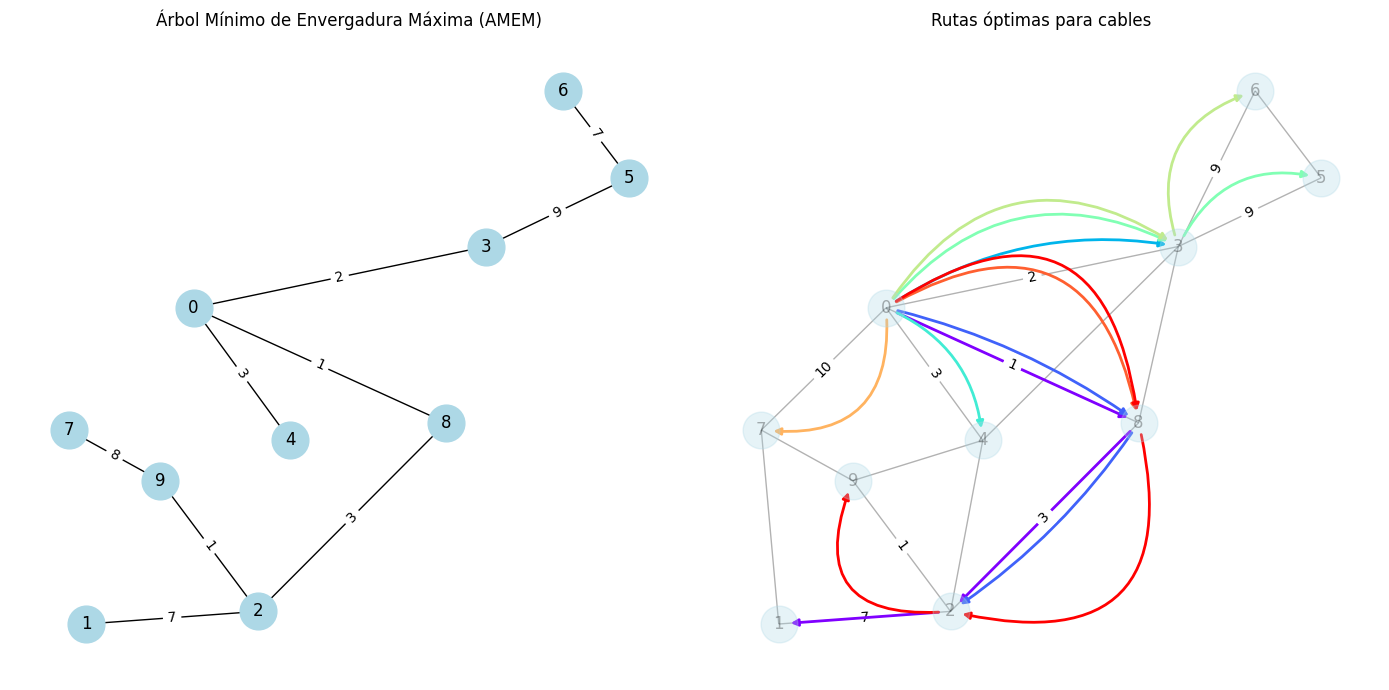

--------------------------------------------------
Solución para alpha = 98.7, beta = 1:
Costo total: 4104.700000000001
Costo tuberías: 4046.7000000000003
Costo cables: 58
Grafico para alpha = 98.7, beta = 1


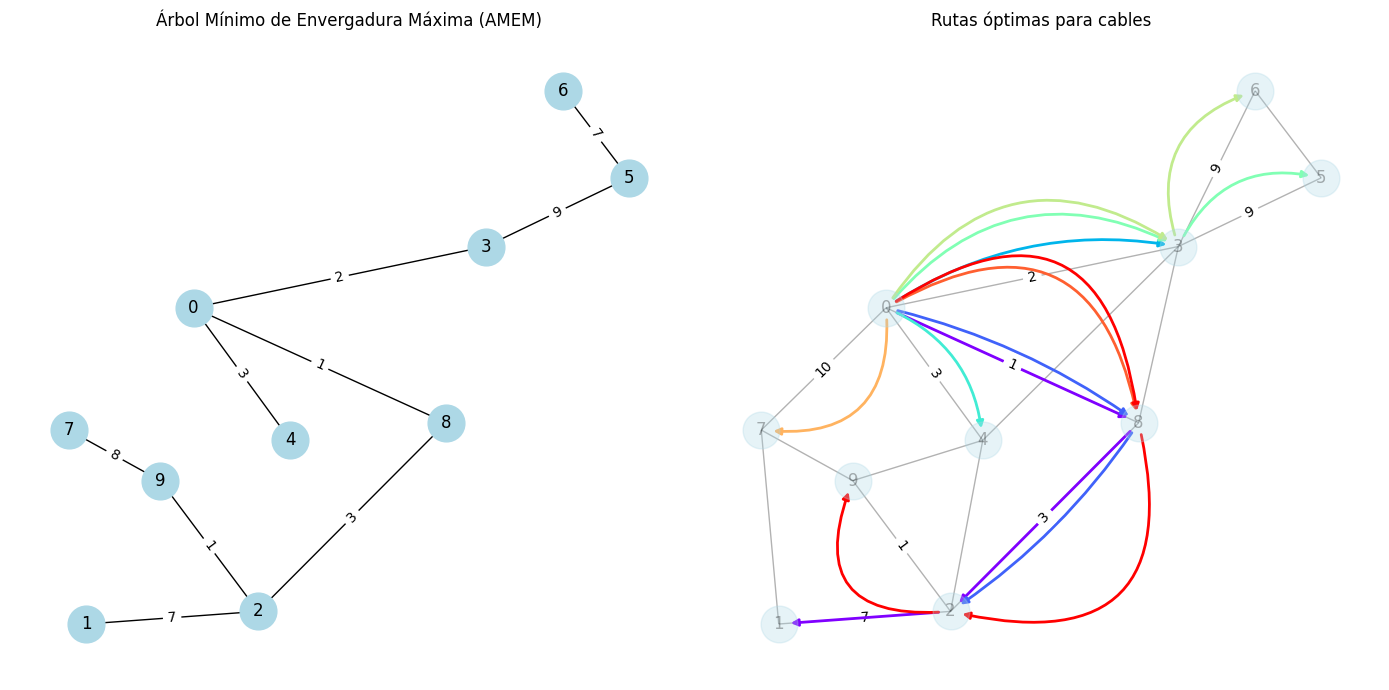

--------------------------------------------------
Solución para alpha = 159.7, beta = 1:
Costo total: 6605.7
Costo tuberías: 6547.7
Costo cables: 58
Grafico para alpha = 159.7, beta = 1


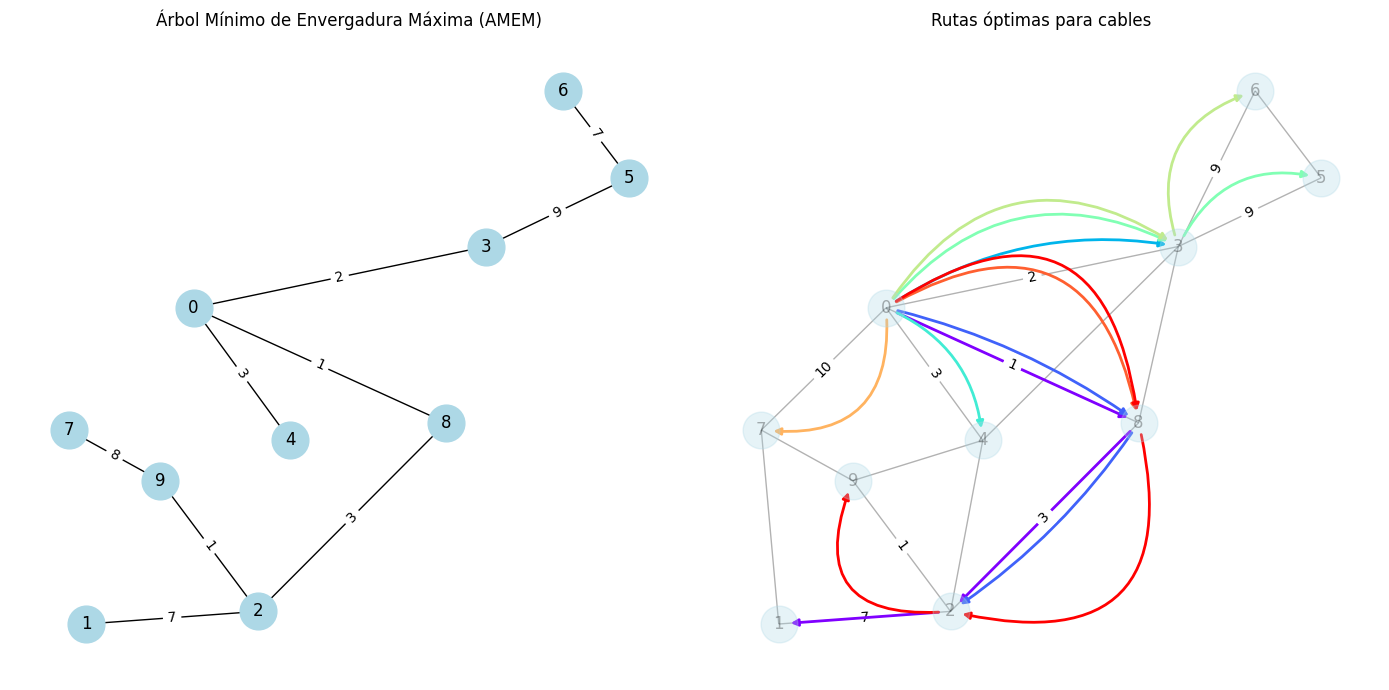

In [ ]:
#17 instancias
alphas = [0, 0.1, 0.1, 0.2, 0.3, 0.5, 0.8, 1.3, 2.1, 3.4, 5.5, 8.9, 14.4, 23.3, 37.7, 61.0, 98.7, 159.7]
betas = [1]
def resolver_y_graficar(alphas, betas, G):
    for alpha in alphas:
        for beta in betas:
            if alpha >= 0 and beta >= 0:
                print("--------------------------------------------------")
                print(f"Solución para alpha = {alpha}, beta = {beta}:")
                # Llamamos a la función
                AMEM, caminos_cables, costo_total = caso_general(alpha, beta, G)

                
                # Graficamos la solución
                print(f"Grafico para alpha = {alpha}, beta = {beta}")
                graficar_solucion(AMEM, caminos_cables, G)
            #else:
               # print("--------------------------------------------------")
               # print(f"Problema resuelto en la Parte I para alpha = {alpha}, beta = {beta}.")

resolver_y_graficar(alphas, betas, G)

